# SyriaTel Customer Churn ML Project

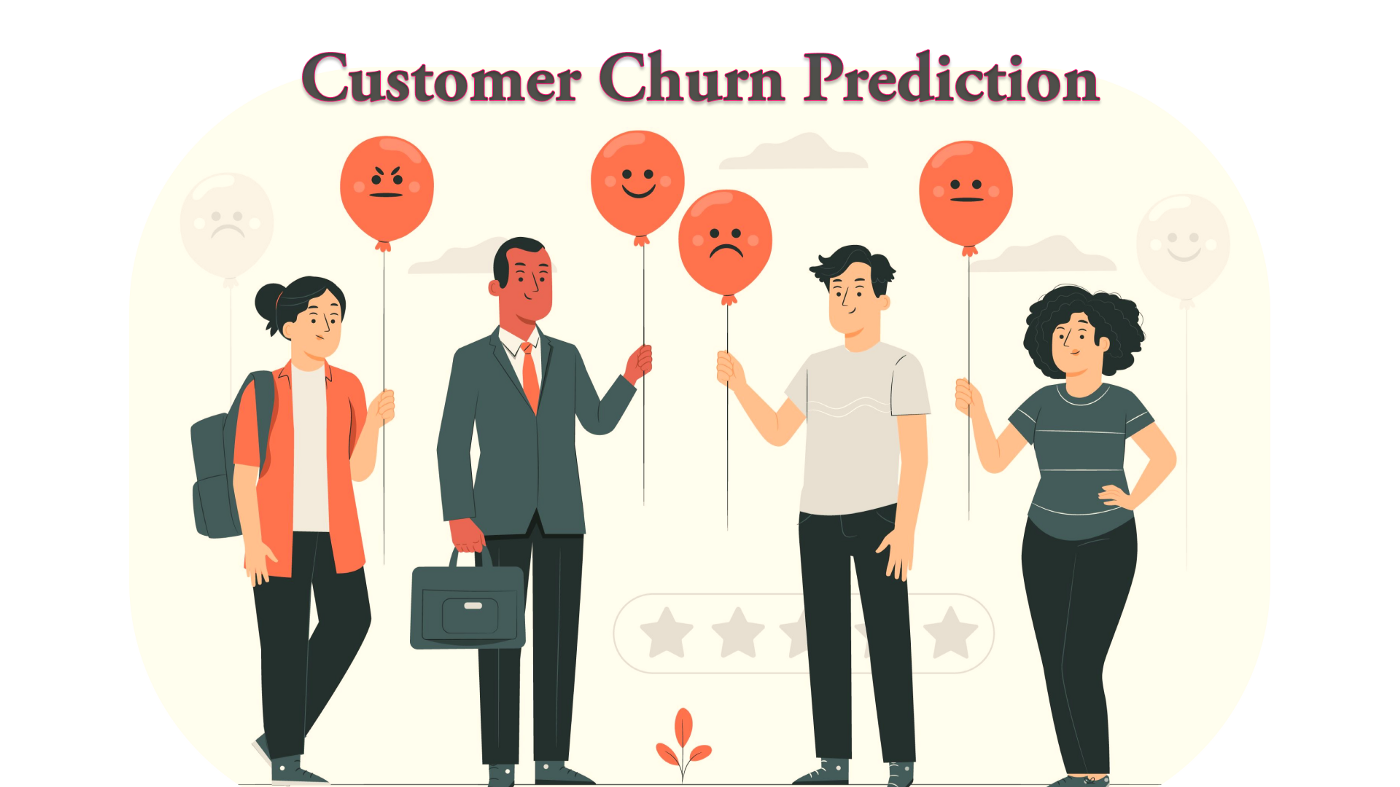

Project by:
- **Name**:  Julius Kinyua Njeri
- **Email**: juliusczar36@gmail.com
- **Date**: June 2024
- **Github Link**: https://github.com/CzarProCoder/SyriaTel_Customer_Churn_ML
- **LinkedIn**: https://www.linkedin.com/in/julius-kinyua
- **Twitter(X)**: https://x.com/Juliuskczar
- **Website**: https://lyonec.com/

# Project Overview

SyriaTel, a telecommunications company, is concerned about customer churn, where customers stop using their services. To address this, the company has gathered data on customer behavior to identify those likely to leave and implement strategies to retain them, as losing customers is costly.

The term “churn” refers to customers leaving the company, and the current churn rate is approximately 14%. Aiming to reduce this rate to about 7%, the project utilized the provided dataset to address key questions:

- Identifying the main features that determine customer churn
- Uncovering any predictable patterns
- Exploring how SyriaTel can leverage these insights to implement cost-effective solutions.

The project aims to develop a classification model to predict customer churn using machine learning techniques. Following the CRISP-DM methodology, the project involves six stages: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. By analyzing the dataset, we aim to uncover patterns and factors driving customer churn and create a predictive model to help reduce customer attrition.

# I: Business Understanding

**Problem Statement**

SyriaTel, a telecommunications company, is experiencing high customer churn as many customers switch to competitors. To address this, the company aims to develop a churn prediction model to identify factors associated with churn and improve customer retention, ultimately boosting profitability.

**Objectives and Success Metrics**

The project aims to:

- Identify key factors leading to customer churn.
- Develop an accurate churn prediction model.
- Implement strategies to retain at-risk customers.

Success will be measured by:

- Achieving a recall score of 0.8 with the prediction model.
- Identifying significant features contributing to churn.
- Providing actionable recommendations to reduce churn and enhance retention.
- Demonstrating the value of proactive retention strategies in reducing revenue losses.

# II: Data Understanding

In [1]:
# Import relevant packgaes

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

**Structure and content**

Let's start by viewing the content of the churn dataset. This is essential for us to understand the general structure of the data in terms of the columns and rows patterns.

In [2]:
df = pd.read_csv('data/dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Dataset Summary**

From the above overview from the info method, we are able to track down the number of columns and rows in out dataset

In [4]:
print(f'Number of Columns = {df.shape[0]} \n\nNumber of Rows = {df.shape[1]} ')

Number of Columns = 3333 

Number of Rows = 21 


In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
def col_info(data):
    """
    This function provides a summary of the column data types.
    """

    col_names = data.columns
    num_cols = data.select_dtypes(int).columns
    cat_cols = data.select_dtypes(object).columns
    boolean_cols = data.select_dtypes(bool).columns
    float_cols = data.select_dtypes(float).columns
    shape = data.shape

    print('col_names: \n\t', col_names)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('num_cols: \n\t', num_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('cat_cols: \n\t', cat_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('boolean_cols: \n\t', boolean_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('float_cols: \n\t', float_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('The shape: \n\t', shape)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print(f"There are {len(num_cols)} numeric type columns, {len(cat_cols)} object type columns, and {len(float_cols)} float type columns out of {shape[1]}")

In [7]:
col_info(df)

col_names: 
	 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


num_cols: 
	 Index([], dtype='object')


cat_cols: 
	 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


boolean_cols: 
	 Index(['churn'], dtype='object')


float_cols: 
	 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')


The shape: 
	 (3333, 21)


There are 0 numeric type columns, 4 object type co

In our case, it is important to distinguish the number of customer churn from the rest

In [8]:
# Those who churned
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

**Targe Variable** - churn

- Out of the 3,333 customers in this dataset, 483 ended their contracts with SyriaTel, resulting in an imbalanced dataset with a churn rate of 14.5%.
- This imbalance must be addressed during preprocessing before modeling.
- Additionally, we will label encode the churn variable, converting it from a boolean to a numeric value. This transformation can be done prior to the train/test split, as it is straightforward and does not risk data leakage.

False    2850
True      483
Name: churn, dtype: int64 

False    0.855086
True     0.144914
Name: churn, dtype: float64


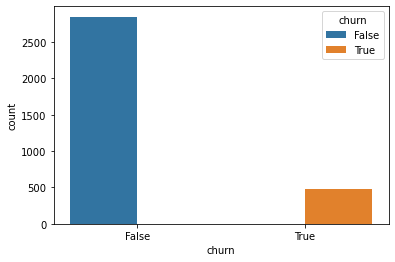

In [9]:
# Churn
print(df.churn.value_counts(), '\n')
print(df.churn.value_counts(normalize=True))

sns.countplot(data=df, x='churn',hue='churn')

plt.savefig('images/churn.png', facecolor='white')

# III: Data Preparation

Rename columns with '_' instead of spaces

In [10]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Let's check for duplicates and missing data

In [11]:
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [12]:
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

Next, we are going to perfom label encoding so that False becomes 0 and True becomes 1

In [13]:
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

It appears that the phone_number is an object type, which may not be useful for predictions, but it can serve as a unique identifier for each customer. The international_plan and voice_main_plan variables can be converted to a binary numeric format, and the state variable, being nominal, can also be transformed into a numeric format.

In [14]:
df.select_dtypes('object')

,state,phone_number,international_plan,voice_mail_plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


**phone_number**

Since there are no duplicates, we can confidently drop the phone_number column as each row is unique.

In [15]:
print(sum(df.phone_number.value_counts().values>1))

0


In [16]:
df.drop('phone_number', axis=1, inplace=True)

**state**

This nominal categorical variable can be converted to numeric using methods like one-hot encoding or label encoding, depending on the needs of the machine learning algorithm. Alternatively, we could map states to their respective time zones to simplify and reduce the number of variables.

In [17]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
ND     62
ME     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

**International_plan and voice_mail_plan**

These variables can be transformed to a binary numeric format. With no set equal to zero and yes set equal to 1. Note that there are far more customers without international and voice mail plans.

no     0.90309
yes    0.09691
Name: international_plan, dtype: float64

no     0.723372
yes    0.276628
Name: voice_mail_plan, dtype: float64


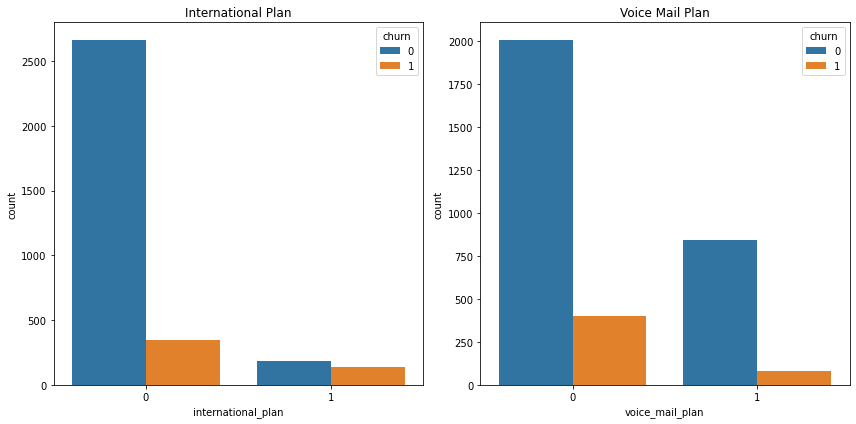

In [18]:
print(df['international_plan'].value_counts(normalize=True))
print()
print(df['voice_mail_plan'].value_counts(normalize=True))


#Performing label encoding
#No becomes 0 and yes becomes 1.
df['international_plan'] = encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = encoder.fit_transform(df['voice_mail_plan'])

#Histograms
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first count plot
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[0])
axes[0].set_title('International Plan')

# Plot the second count plot
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[1])
axes[1].set_title('Voice Mail Plan')

# Adjust layout
plt.tight_layout()

plt.savefig('images/International_plan_and_voice_mail_plan.png', facecolor='white')

# Show the plots
plt.show();

**Numeric Columns**

Examining the numeric columns, it appears that some information may be redundant. We will need to analyze the correlations to make an informed decision on consolidating these columns.

In [19]:
df.select_dtypes('number')

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Here are the observations gleaned from the distributions:

- Regarding account length: One member has been associated with the company for approximately double the duration of 75% of the customers.
- For area code: It essentially serves as a categorical variable. Employing label encoding could be a viable approach.
- In terms of the number of voicemail messages: Half of the dataset records zero voicemail messages, which correlates with the fact that 72% of the customers lack voicemail plans.

In [20]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Correlation Analysis

Examining the heatmap provided, it becomes evident that there's a strong correlation between charge and minutes, which aligns logically with the company's per-minute charging system.

> If necessary, we can confidently eliminate the 'charge' column across all categories—day, eve, night, and intl. Retaining the 'minutes' category seems prudent since the currency metric for 'charge' remains unclear.

A few weak correlations are observed concerning our target churn variable: customer_service_calls, international_plan, and total_day_minutes display a slight positive correlation with churn.

> Despite their weakness, these correlations merit consideration for inclusion in our models.

Additionally, a nearly perfect correlation exists between number_vmail_messages and voice_mail_plan, which is expected given their similar implications. Consequently, if required, we could omit number_vmail_messages from consideration.

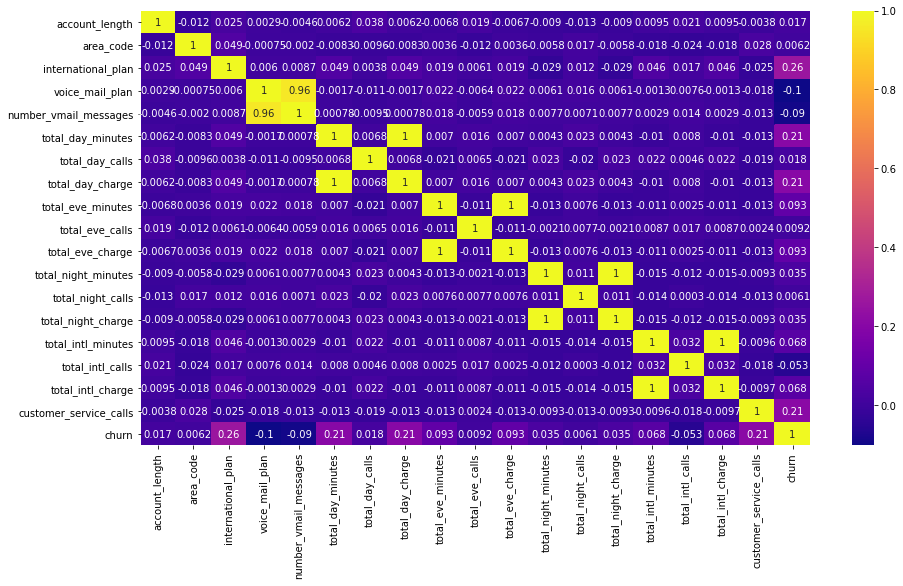

In [21]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='plasma')

plt.savefig('images/correlation_matrix', facecolor='white')

## Train Test Split

For our base model we will keep the train/test split as the default .75/.25 respectively. Since we know we have class imbalance, we will have stratify = y so our class proportions stay the same for both our train and test data.

In [40]:
# Define X and y, and split train/test data
df_copy = df.copy()

X = df_copy.drop(columns=['churn'],axis=1)
y = df_copy['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [41]:
# # Tranform 'state' column with OneHotEncoder

# ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='error')
# ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['state']]),columns=ohe.get_feature_names_out(['state']),index=X_train.index)
# X_train.drop(columns=['state'],axis=1,inplace=True)
# X_train = pd.concat([X_train,ohe_df],axis=1)
# X_train

In [42]:
# Fit OneHotEncoder on the training data and transform both train and test data

def apply_one_hot_encoder(train_df, test_df, column_name):
    ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='error')
    ohe.fit(train_df[[column_name]])
    
    # Transform the training data
    train_ohe_df = pd.DataFrame(ohe.transform(train_df[[column_name]]), 
                                columns=ohe.get_feature_names_out([column_name]), 
                                index=train_df.index)
    train_df.drop(columns=[column_name], axis=1, inplace=True)
    train_df = pd.concat([train_df, train_ohe_df], axis=1)
    
    # Transform the test data
    test_ohe_df = pd.DataFrame(ohe.transform(test_df[[column_name]]), 
                               columns=ohe.get_feature_names_out([column_name]), 
                               index=test_df.index)
    test_df.drop(columns=[column_name], axis=1, inplace=True)
    test_df = pd.concat([test_df, test_ohe_df], axis=1)
    
    return train_df, test_df

# Apply OneHotEncoder to 'state' column
X_train, X_test = apply_one_hot_encoder(X_train, X_test, 'state')

X_train

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
556,123,408,0,0,0,159.5,77,27.12,303.8,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2596,73,408,0,0,0,122.0,92,20.74,138.3,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,81,415,0,1,28,167.9,147,28.54,190.7,105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1152,16,408,0,0,0,209.5,89,35.62,172.8,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3060,94,415,0,0,0,212.1,98,36.06,189.4,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,116,510,0,1,12,221.0,108,37.57,151.0,118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2165,160,415,0,0,0,171.2,103,29.10,243.5,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2988,105,415,0,0,0,259.3,96,44.08,175.2,97,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
179,70,408,0,0,0,232.1,122,39.46,292.3,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Apply OneHotEncoder to 'area_code' column

X_train, X_test = apply_one_hot_encoder(X_train, X_test, 'area_code')

# Output the transformed test data
X_test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
2974,201,0,0,0,212.7,72,36.16,225.2,90,19.14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2791,151,0,0,0,194.8,106,33.12,292.7,103,24.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3131,107,0,0,0,189.7,76,32.25,156.1,65,13.27,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
872,149,0,1,43,206.7,79,35.14,174.6,122,14.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,123,0,0,0,166.9,98,28.37,221.8,77,18.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1325,17,0,1,31,153.1,115,26.03,185.9,59,15.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1018,76,0,0,0,263.4,148,44.78,230.3,69,19.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
596,124,0,0,0,157.5,70,26.78,130.7,79,11.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# IV: Modeling

## 5. 1st Model

Give that all our features in the right format, we can build our base model with `DummyClassifier` using the `stratified` strategy since we have an imbalanced dataset skewed in the direction of class 0 when we are interested in predicting class 1.

In [20]:
# Initiate base model with DummyClassifer

base = DummyClassifier(strategy = 'stratified',random_state=42)
base.fit(X_train,y_train)

DummyClassifier(random_state=42, strategy='stratified')

Off the bat, we have a pretty good accuracy, for our business initiative we will be more focused on getting a good recall score, so it is good that our base data has a decent accuracy score. We will want to find an approriate balance between the two.

In [21]:
base.score(X_train, y_train)

0.7527010804321729

### Model with Cross Validation Class
We created a class to help us run Cross Validation more easily on other models.

In [22]:
class ModCrossVal():
    '''Create model and see the crossvalidation more easily'''

    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
    
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_std = None
    
        if cv_now:
            self.cross__val()
    
    def cross__val(self,X=None,y=None, kfolds=5):
        '''
        Perform cross validation and return results.
    
        Args:
         X:
          Optional; Training data to perform CV on. Otherwise use X from object
         y:
          Optional; Training data to perform CV on. Otherwise use y from object
         kfolds:
          Optional; Number of folds for CV (default is 10)  
        '''
    
        cv_X = X if X else self.X
        cv_y = y if y else self.y
    
        self.cv_results = cross_validate(self.model,cv_X,cv_y,scoring='recall',return_train_score=True,cv=kfolds)
        self.cv_train_mean = np.mean(self.cv_results['train_score'])
        self.cv_test_mean = np.mean(self.cv_results['test_score'])
        self.cv_test_std = np.std(self.cv_results['test_score'])

    
    def cv_summary(self):
        
        summary = {
            'model_name':self.name,'cv_train_mean':self.cv_train_mean,
            'cv_test_mean':self.cv_test_mean,'cv_test_std':self.cv_test_std
        }
    
        cv_summary = pd.DataFrame(summary,columns=['model_name','cv_train_mean','cv_test_mean','cv_test_std'],
                                  index=range(1))
        return cv_summary        

To start, we will fit our data to a `LogisiticRegression` model with a `liblinear` solver so that we can potentially test both L1 and L2 penalties.

In [23]:
# Initate our first Logistic Regression model with all of our features included

logreg_model = LogisticRegression(random_state=42,solver='liblinear')
logreg_model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

Comparing our first `LogisticRegression` model with our `base`, we can see that our `LogisticRegression` model does somewhat better at predicting `churn` with a higher True Positive Rate than our `base`.

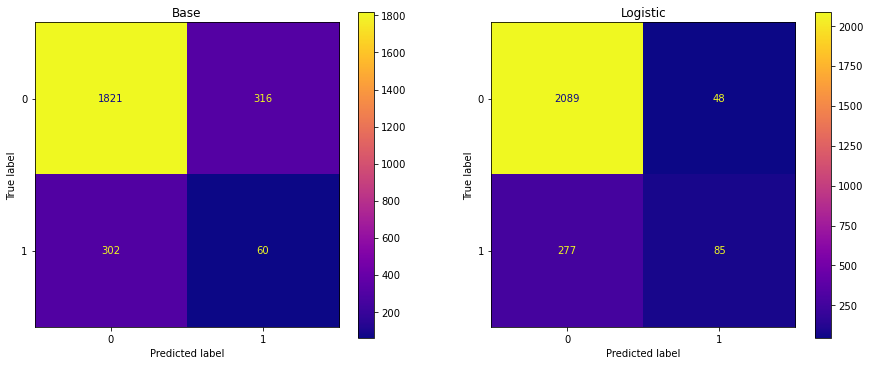

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Base')
ax[1].set_title('Logistic')

ConfusionMatrixDisplay.from_estimator(base,X_train,y_train,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_model,X_train,y_train,ax=ax[1],cmap='plasma');

Next, we can try fitting the `LogisticRegression` model with an L1 penalty.

In [25]:
logreg_model_l1 = LogisticRegression(random_state=42,solver='liblinear',penalty='l1',max_iter=300)
logreg_model_l1.fit(X_train,y_train)

LogisticRegression(max_iter=300, penalty='l1', random_state=42,
                   solver='liblinear')

### Compare L1 and L2 solvers

It looks like the Logisic L1 model does better than both previous models but only slightly. However our class imbalance makes it difficult to assess accurately and needs to be addressed.

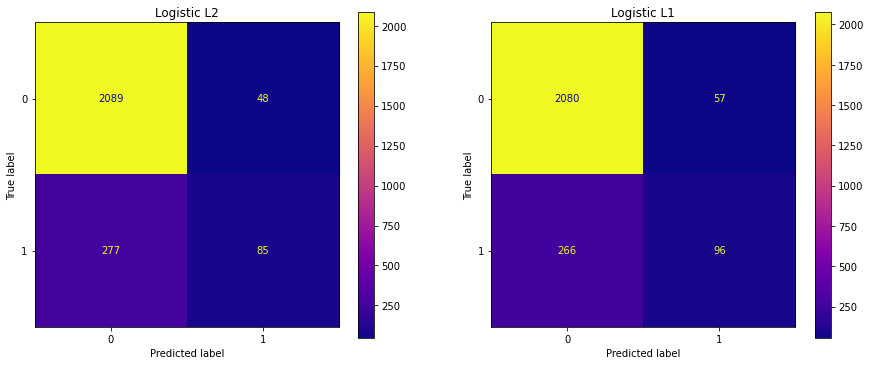

In [26]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Logistic L2')
ax[1].set_title('Logistic L1')

ConfusionMatrixDisplay.from_estimator(logreg_model,X_train,y_train,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_model_l1,X_train,y_train,ax=ax[1],cmap='plasma');

### Class Imbalance with `SMOTE`

We can easily resample and even out the distribution among the classes. 

In [27]:
# Print original class distribution
print('Original Class Distribution: \n')
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

# Preview new class distribution
print('------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original Class Distribution: 

0    2137
1     362
Name: churn, dtype: int64
------------------------------
Synthetic sample class distribution: 

1    2137
0    2137
Name: churn, dtype: int64


### Model with Cross Validation

Now we have cross validated our results to finalize our 1st model with `LogisiticRegression`.

It looks like our model performs nearly the same on the train and test (validation) data. We can probably get this even higher after we simplify our model some more.

In [28]:
# Refit with resampled training data

logreg_model_l1 = LogisticRegression(random_state=42,solver='liblinear',penalty='l1', max_iter=500)
logreg_model_l1.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')

In [29]:
# Cross validate with ModCrossVal class

mcv = ModCrossVal(logreg_model_l1, "Logistic L1", X_train_resampled, y_train_resampled)
logreg_l1_sum = mcv.cv_summary()
logreg_l1_sum

,model_name,cv_train_mean,cv_test_mean,cv_test_std
0,Logistic L1,0.781002,0.766504,0.017464


### Finetune `C` with Cross Validation

We should also perform cross validation with finetune'd `C` to assess what level of penalty is best for our model.

In [30]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
l1_results = pd.DataFrame()

for c in C_values:
    logreg_l1 = LogisticRegression(random_state=42, C=c, solver='liblinear', penalty='l1',max_iter=500)
    logreg_l1.fit(X_train_resampled, y_train_resampled)
    new_results = ModCrossVal(logreg_l1, f'Logreg L1 c{c:e}', X_train_resampled, y_train_resampled)
    l1_results = pd.concat([l1_results, new_results.cv_summary()])
    l1_results.index=range(len(l1_results))
    
    l1_results

In [31]:
l1_results.sort_values(by='cv_test_mean',ascending=False,inplace=True)
l1_results

,model_name,cv_train_mean,cv_test_mean,cv_test_std
0,Logreg L1 c1.000000e-04,0.955670,0.949421,0.058310
3,Logreg L1 c1.000000e-01,0.781703,0.769764,0.029778
4,Logreg L1 c1.000000e+00,0.781002,0.766504,0.017464
2,Logreg L1 c1.000000e-02,0.713032,0.707542,0.024274
1,Logreg L1 c1.000000e-03,0.566566,0.567145,0.026597


In [32]:
# Run optimized model

logregl1_opt = LogisticRegression(random_state=42, C=0.0001, solver='liblinear', penalty='l1')
logregl1_opt = logregl1_opt.fit(X_train_resampled,y_train_resampled)

In [33]:
# Define get_recall function

recall_results = []

def get_recall(model,model_name,X,y):

    recall = recall_score(y,model.predict(X))

    summary = {
        'model_name':f'{model_name}', 'recall_score':recall
    }
    summary_df = pd.DataFrame(summary,columns=['model_name','recall_score'],index=range(1))

    return summary_df

Our optimized results after finetuning the `C` look pretty good, though slightly less than before optimizing `C`. Once we attempt to simplify some more, we will want to look at other scores such as accuracy and precision to make sure our results are balanced enough for the business problem at hand.

In [34]:
# Get final train recall

logregl1_recall = get_recall(model=logregl1_opt,model_name="Logistic L1",X=X_train_resampled,y=y_train_resampled)
logregl1_recall

,model_name,recall_score
0,Logistic L1,0.754796


We will create a data frame to collect all of our scores pertaining to our optimized versions of each model under consideration.

In [35]:
# Initiate model results df

def concat_results(recall_results):
    recall_summary = pd.DataFrame()
    recall_summary = pd.concat(recall_results)
    recall_summary.index=range(len(recall_summary))
    return recall_summary

recall_results = [logregl1_recall]

## 6. 2nd Model

Since we know that there are features that are highly correlated we will use `SelectFromModel` to select features for us that are most important.

In [36]:
# Initiate selector
selector = SelectFromModel(logreg_model_l1)

# Using the original resampling from first SMOTE initiation
selector.fit(X_train,y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=500, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'))

In [37]:
def select_important_features(X, selector):
    """
    Given a DataFrame and a selector, use the selector to choose
    the most important columns
    """
    imps = dict(zip(X.columns, selector.get_support()))
    selected_array = selector.transform(X)
    selected_df = pd.DataFrame(selected_array,
                               columns=[col for col in X.columns if imps[col]],
                               index=X.index)
    return selected_df

We will use the default threshold to start and identify which features meet threshold requirements. Since we are still using our L1 Logistic model, the default threshold will be $1e^-5$.

It looks like there are several features that do not meet the threshold.

In [38]:
# Initate get_support 

sup = selector.get_support()

unique, counts = np.unique(sup,return_counts=True)

# Print as array and transpose to see count of features that do not meet the threshold
print(np.asarray((unique,counts)).T)

[[ 0 16]
 [ 1 53]]


In [39]:
# Create dictionary matching results with features

dict(zip(X_train.columns,selector.get_support()))

{'account_length': True,
 'international_plan': True,
 'voice_mail_plan': True,
 'number_vmail_messages': True,
 'total_day_minutes': True,
 'total_day_calls': True,
 'total_day_charge': True,
 'total_eve_minutes': True,
 'total_eve_calls': True,
 'total_eve_charge': True,
 'total_night_minutes': True,
 'total_night_calls': True,
 'total_night_charge': False,
 'total_intl_minutes': True,
 'total_intl_calls': True,
 'total_intl_charge': False,
 'customer_service_calls': True,
 'state_AL': True,
 'state_AR': False,
 'state_AZ': True,
 'state_CA': True,
 'state_CO': False,
 'state_CT': True,
 'state_DC': True,
 'state_DE': True,
 'state_FL': True,
 'state_GA': False,
 'state_HI': True,
 'state_IA': False,
 'state_ID': True,
 'state_IL': True,
 'state_IN': False,
 'state_KS': True,
 'state_KY': True,
 'state_LA': False,
 'state_MA': False,
 'state_MD': True,
 'state_ME': True,
 'state_MI': True,
 'state_MN': True,
 'state_MO': False,
 'state_MS': True,
 'state_MT': True,
 'state_NC': False

In [40]:
# Recreate X_train with best features out

X_train_slct = select_important_features(X=X_train, selector=selector)

X_train_slct

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WY,area_code_415,area_code_510
556,123.0,0.0,0.0,0.0,159.5,77.0,27.12,303.8,92.0,25.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2596,73.0,0.0,0.0,0.0,122.0,92.0,20.74,138.3,114.0,11.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,81.0,0.0,1.0,28.0,167.9,147.0,28.54,190.7,105.0,16.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1152,16.0,0.0,0.0,0.0,209.5,89.0,35.62,172.8,85.0,14.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3060,94.0,0.0,0.0,0.0,212.1,98.0,36.06,189.4,89.0,16.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,116.0,0.0,1.0,12.0,221.0,108.0,37.57,151.0,118.0,12.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2165,160.0,0.0,0.0,0.0,171.2,103.0,29.10,243.5,121.0,20.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2988,105.0,0.0,0.0,0.0,259.3,96.0,44.08,175.2,97.0,14.89,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
179,70.0,0.0,0.0,0.0,232.1,122.0,39.46,292.3,112.0,24.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Recreate X_test with best features out

X_test_slct = select_important_features(X=X_test, selector=selector)

X_test_slct

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WY,area_code_415,area_code_510
2974,201.0,0.0,0.0,0.0,212.7,72.0,36.16,225.2,90.0,19.14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2791,151.0,0.0,0.0,0.0,194.8,106.0,33.12,292.7,103.0,24.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,141.0,1.0,1.0,37.0,258.6,84.0,43.96,222.0,111.0,18.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3131,107.0,0.0,0.0,0.0,189.7,76.0,32.25,156.1,65.0,13.27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
872,149.0,0.0,1.0,43.0,206.7,79.0,35.14,174.6,122.0,14.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,123.0,0.0,0.0,0.0,166.9,98.0,28.37,221.8,77.0,18.85,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1325,17.0,0.0,1.0,31.0,153.1,115.0,26.03,185.9,59.0,15.80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1018,76.0,0.0,0.0,0.0,263.4,148.0,44.78,230.3,69.0,19.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
596,124.0,0.0,0.0,0.0,157.5,70.0,26.78,130.7,79.0,11.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# Resample with selected features

smote = SMOTE(random_state=42)
X_train_resamp_slct, y_train_resamp_slct = smote.fit_resample(X_train_slct,y_train)

#### Run and Cross Validate

Now we can run our cross validation again to see how it does in comparison to the other model and it's own validation set.

In [43]:
logreg_slct = LogisticRegression(random_state=42,solver='liblinear',penalty='l1',max_iter=500)
logreg_slct.fit(X_train_resamp_slct,y_train_resamp_slct)

LogisticRegression(max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')

It looks like our selected feature model did around the same as our Logistic L1 model before finetuning. It is worth noting that this is a simpler model as it has reduced features. 

In [44]:
mcv = ModCrossVal(logreg_slct,'Logistic Select', X_train_resamp_slct,y_train_resamp_slct)
logreg_sel_sum = mcv.cv_summary()
logreg_sel_sum

,model_name,cv_train_mean,cv_test_mean,cv_test_std
0,Logistic Select,0.811652,0.806288,0.03124


#### Finetune `C` with Cross Validation

Just like our Logreg L1 model, the Logreg Select model does best with smaller `C` values, so we will want to use the smallest value with our optimized model.

In [45]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
slct_results = pd.DataFrame()

for c in C_values:
    logreg_select = LogisticRegression(random_state=42, C=c, solver='liblinear', penalty='l1',max_iter=500)
    logreg_select.fit(X_train_resamp_slct, y_train_resamp_slct)
    new_results = ModCrossVal(logreg_select, f'Logreg Select c{c:e}', X_train_resamp_slct, y_train_resamp_slct)
    slct_results = pd.concat([slct_results, new_results.cv_summary()])
    slct_results.index=range(len(slct_results))

    slct_results

In [46]:
slct_results.sort_values(by='cv_test_mean',ascending=False,inplace=True)
slct_results

,model_name,cv_train_mean,cv_test_mean,cv_test_std
0,Logreg Select c1.000000e-04,0.953097,0.948018,0.058589
4,Logreg Select c1.000000e+00,0.811652,0.806288,0.031240
3,Logreg Select c1.000000e-01,0.791180,0.785690,0.025930
2,Logreg Select c1.000000e-02,0.765325,0.757606,0.026863
1,Logreg Select c1.000000e-03,0.566800,0.566671,0.030958


In [47]:
# Run optimized model

logreg_slct_opt = LogisticRegression(random_state=42, C=0.0001, solver='liblinear', penalty='l1')
logreg_slct_opt = logreg_slct_opt.fit(X_train_resamp_slct,y_train_resamp_slct)

Our Logistic Select model did pretty well though It performed around the same as our first Logtistic model after optimization.

In [48]:
# Get optimized results

logreg_slct_recall = get_recall(logreg_slct_opt,'Logistic Select', X_train_resamp_slct,y_train_resamp_slct,)
logreg_slct_recall

,model_name,recall_score
0,Logistic Select,0.751989


### Compare Models

Comparing both `recall` metrics and Confusion Matrices of the two models so far, it looks like our second Logistic Regression model is performing slightly better after optimization of the `C` parameter.

In [49]:
# Compare final train recall

recall_results.append(logreg_slct_recall)

concat_results(recall_results)

,model_name,recall_score
0,Logistic L1,0.754796
1,Logistic Select,0.751989


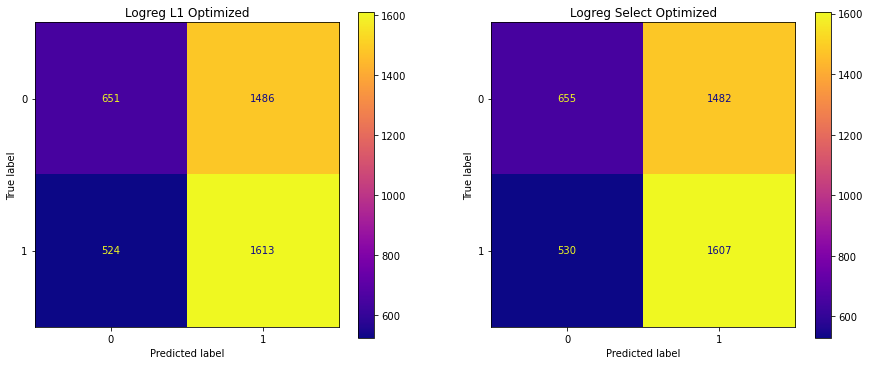

In [50]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Logreg L1 Optimized')
ax[1].set_title('Logreg Select Optimized')

ConfusionMatrixDisplay.from_estimator(logregl1_opt,X_train_resampled,y_train_resampled,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_slct_opt,X_train_resamp_slct,y_train_resamp_slct,ax=ax[1],cmap='plasma');

## 7. 3rd Model

For our final itteration of the LogisticRegression model we should try manual feature selection with features we know to be highly correlated with `churn`. 

In [51]:
#Excluding total international minutes
highly_correlated_variables = df[['international_plan', 'total_day_minutes', 'total_eve_minutes', 
                                  'total_intl_minutes', 'customer_service_calls', 'churn']]
highly_correlated_variables.head()

,international_plan,total_day_minutes,total_eve_minutes,total_intl_minutes,customer_service_calls,churn
0,0,265.1,197.4,10.0,1,0
1,0,161.6,195.5,13.7,1,0
2,0,243.4,121.2,12.2,0,0
3,1,299.4,61.9,6.6,2,0
4,1,166.7,148.3,10.1,3,0


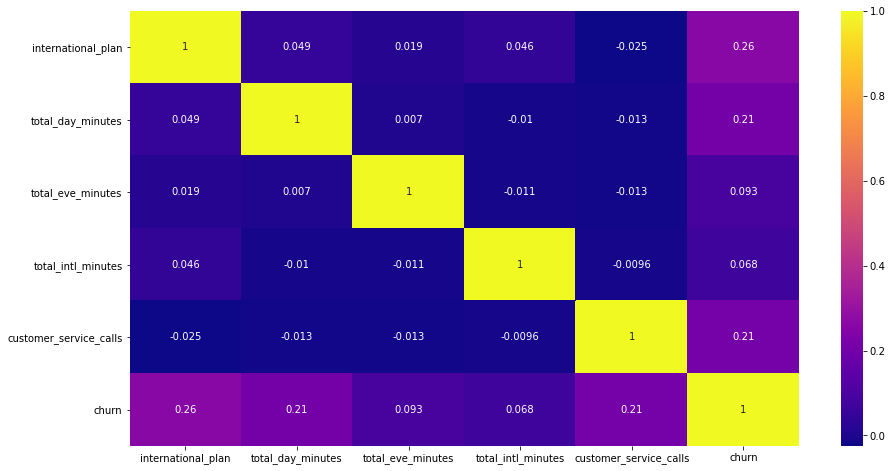

In [52]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(highly_correlated_variables.corr(),annot=True,cmap='plasma');

In [53]:
# Define X and y, and split train/test data
df_copy = highly_correlated_variables.copy()

X_red = df_copy.drop(columns=['churn'],axis=1)
y_red = df_copy['churn']

X_train_red, X_test_red, y_train_red, y_test_red= train_test_split(X_red,y_red,random_state=42,stratify=y)

In [54]:
# Print original class distribution
print('Original Class Distribution: \n')
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_red_resamp, y_train_red_resamp = smote.fit_resample(X_train_red,y_train_red)

# Preview new class distribution
print('------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_red_resamp).value_counts())

Original Class Distribution: 

0    2137
1     362
Name: churn, dtype: int64
------------------------------
Synthetic sample class distribution: 

1    2137
0    2137
Name: churn, dtype: int64


### Run and Cross Validate

In [55]:
logreg_red = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_red.fit(X_train_red_resamp, y_train_red_resamp)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

Before finetuning, our model performs slightly worse than our previous two.

In [56]:
mcv = ModCrossVal(logreg_red,'Logistic Reduced', X_train_red_resamp, y_train_red_resamp)
logreg_red_sum = mcv.cv_summary()
logreg_red_sum

,model_name,cv_train_mean,cv_test_mean,cv_test_std
0,Logistic Reduced,0.715489,0.710818,0.036467


### Finetune `C` with Cross Validation

As with other models, the smallest `C` values gives us the best results. We will again, use this value within our optimized results.

In [57]:
C_values = [0.00015, 0.0002, 0.0015, 0.002, .015]
reduced_results = pd.DataFrame()

for c in C_values:
    logreg_red = LogisticRegression(random_state=42, C=c, solver='liblinear', penalty='l1',max_iter=500)
    logreg_red.fit(X_train_red_resamp, y_train_red_resamp)
    new_results = ModCrossVal(logreg_red, f'Logreg Reduced c{c:e}', X_train_red_resamp, y_train_red_resamp)
    reduced_results = pd.concat([reduced_results, new_results.cv_summary()])
    reduced_results.index = range(len(reduced_results))
    
    reduced_results

In [58]:
reduced_results.sort_values(by='cv_test_mean',ascending=False,inplace=True)
reduced_results

,model_name,cv_train_mean,cv_test_mean,cv_test_std
0,Logreg Reduced c1.500000e-04,0.993449,0.992514,0.004998
1,Logreg Reduced c2.000000e-04,0.872834,0.873193,0.031108
2,Logreg Reduced c1.500000e-03,0.720753,0.721571,0.005787
3,Logreg Reduced c2.000000e-03,0.718764,0.718764,0.004803
4,Logreg Reduced c1.500000e-02,0.700632,0.700055,0.019202


In [59]:
# Run optimized model

logreg_red_opt = LogisticRegression(random_state=42, C=0.00015, solver='liblinear', penalty='l1')
logreg_red_opt = logreg_red_opt.fit(X_train_red_resamp, y_train_red_resamp)

e get a pretty good recall score after optimizing! We will definitely want to make sure we balance accuracy within our decision making process. All in all, it seems like our manual feature selection yields the best recall.

In [60]:
# Get optimized score

logreg_red_recall = get_recall(logreg_red_opt,'Logistic Reduced', X_train_red_resamp, y_train_red_resamp)
logreg_red_recall

,model_name,recall_score
0,Logistic Reduced,0.899392


### Compare Optimized Logistic Models

Comparing confusion matrices of all 3 `LogisticRegression` models, our most recent Logistic Reduced model does best at predicting True Positives (customers going to churn) and reducing False Negatives (customers appearing to be retained but who actually churn).

This can provide valuable intervention insights to our stakeholders given a strategic approach to address the high amount False Positives (customers appearing to potentially churn but actually end up retained).

In [61]:
# Compare final train recall for all Logistic Models

recall_results.append(logreg_red_recall)

concat_results(recall_results)

,model_name,recall_score
0,Logistic L1,0.754796
1,Logistic Select,0.751989
2,Logistic Reduced,0.899392


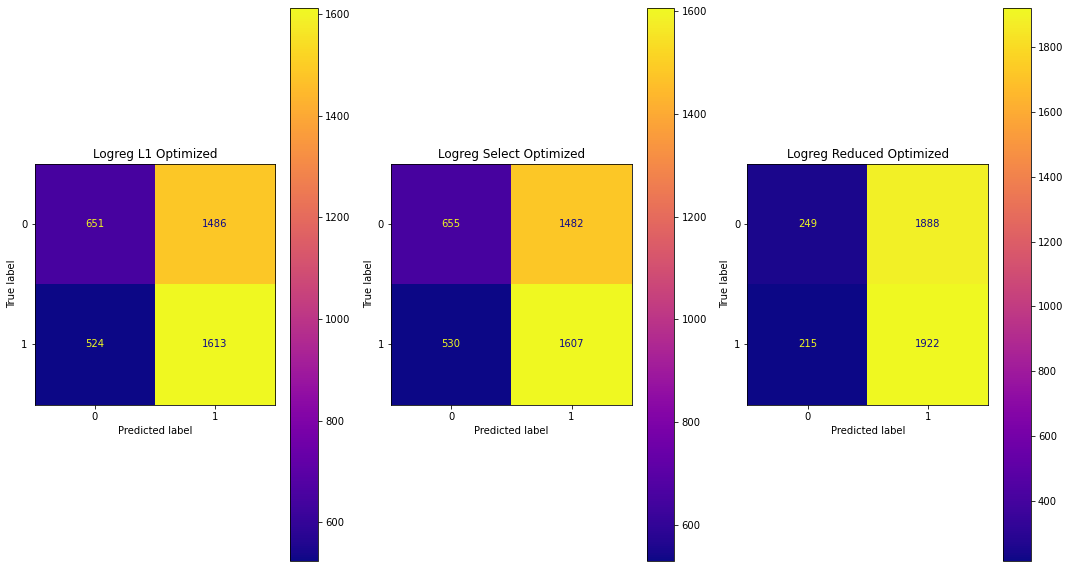

In [62]:
fig, ax = plt.subplots(ncols=3,figsize=(15,8))

ax[0].set_title('Logreg L1 Optimized')
ax[1].set_title('Logreg Select Optimized')
ax[2].set_title('Logreg Reduced Optimized')

ConfusionMatrixDisplay.from_estimator(logregl1_opt,X_train_resampled,y_train_resampled,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_slct_opt,X_train_resamp_slct,y_train_resamp_slct,ax=ax[1],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_red_opt,X_train_red_resamp, y_train_red_resamp,ax=ax[2],cmap='plasma')

plt.tight_layout();

## 8. Run Final Models on Test

We will now run our models with test data and evaluate each classification report associated. As expected, our 3rd Model produces the highest recall. As this is our primary focus for **Phase 1** of this business initiative we will want to recommend deployment of this model and address the concerns regarding our lower precision and accuracy scores within our approach recommendations as well as next steps.

In [63]:
#Make predictions on test data
y_pred_1 = logregl1_opt.predict(X_test)
y_pred_2 = logreg_slct_opt.predict(X_test_slct)
y_pred_3 = logreg_red_opt.predict(X_test_red)

In [64]:
# Run classification report on all models
for i, y_pred in enumerate([y_pred_1, y_pred_2, y_pred_3]):
    if y_pred[i] == y_pred[3]:
        print(f'Classification report for Model {i+1}:\n')
        print(classification_report(y_test_red,y_pred))
    else:
        print(f'Classification report for Model {i+1}:\n')
        print(classification_report(y_test,y_pred))

Classification report for Model 1:

              precision    recall  f1-score   support

           0       0.91      0.32      0.48       713
           1       0.17      0.81      0.28       121

    accuracy                           0.39       834
   macro avg       0.54      0.57      0.38       834
weighted avg       0.80      0.39      0.45       834

Classification report for Model 2:

              precision    recall  f1-score   support

           0       0.91      0.33      0.48       713
           1       0.17      0.81      0.28       121

    accuracy                           0.40       834
   macro avg       0.54      0.57      0.38       834
weighted avg       0.80      0.40      0.45       834

Classification report for Model 3:

              precision    recall  f1-score   support

           0       0.96      0.13      0.24       713
           1       0.16      0.97      0.27       121

    accuracy                           0.26       834
   macro avg       0

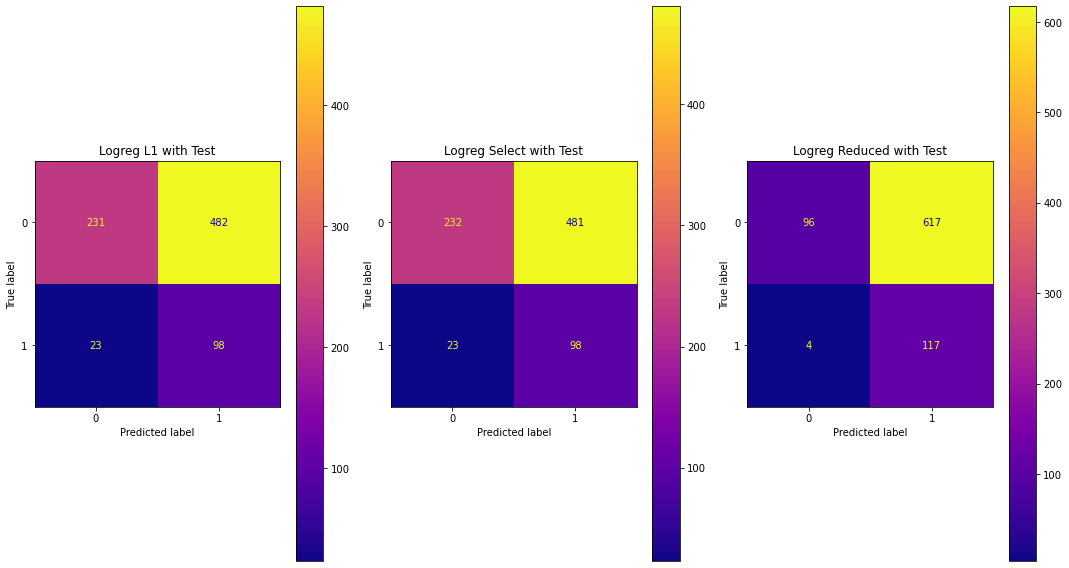

In [65]:
fig, ax = plt.subplots(ncols=3,figsize=(15,8))

ax[0].set_title('Logreg L1 with Test')
ax[1].set_title('Logreg Select with Test')
ax[2].set_title('Logreg Reduced with Test')

ConfusionMatrixDisplay.from_estimator(logregl1_opt,X_test,y_test,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_slct_opt,X_test_slct,y_test,ax=ax[1],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_red_opt,X_test_red, y_test_red,ax=ax[2],cmap='plasma')

plt.tight_layout();

## 9. 4th Model

As stated, we will now construct and run a `DecisionTreeClassifier` on the dataset defined in our most recent model. We will also call on `GridSearchCV` to help us find the best parameters for our decision tree to run and result in the best recall score while also performing cross validation.

The dataset was set up similar to model 3.

In [66]:
# Define X and y, and split train/test data
df_copy = highly_correlated_variables.copy()

X = df_copy.drop(columns=['churn'],axis=1)
y = df_copy['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7,stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [67]:
# Define the parameters to search
tree_params = {
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 11)),  # Values from 2 to 10
    'min_samples_leaf': list(range(1, 5)),  # Values from 1 to 4
    'max_features': list(range(1, X.shape[1] + 1)),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best']
}

# Create a DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
clf = GridSearchCV(dtc, tree_params, cv=5, scoring='recall', return_train_score=True)

# Fit the model
clf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("Best Parameters:", clf.best_params_)

# Print the best score found
print("Best Recall Score:", clf.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Recall Score: 0.9405830725119833


Our results look great! These recall scores are the highest we've seen, even after optimizing the other models. We are also not seeing any overfitting or underfitting since both train and test(validation) scores are balanced. Although, this was also the case with our other models so we have to run the test to be certain that this model doesn't pose the same issue.

In [68]:
cv_results = {
    "Metrics": ['Mean Train Score', 'Train Standard Deviation Score',
               'Mean Test Score', 'Test Standard Deviation Score'],
    "Values": [
        clf.cv_results_['mean_train_score'][clf.best_index_],
        clf.cv_results_['std_train_score'][clf.best_index_],
        clf.cv_results_['mean_test_score'][clf.best_index_],
        clf.cv_results_['std_test_score'][clf.best_index_]
    ]
}

tree_summary = pd.DataFrame(cv_results, columns=['Metrics', 'Values'])

tree_summary

,Metrics,Values
0,Mean Train Score,0.946065
1,Train Standard Deviation Score,0.022619
2,Mean Test Score,0.940583
3,Test Standard Deviation Score,0.027754


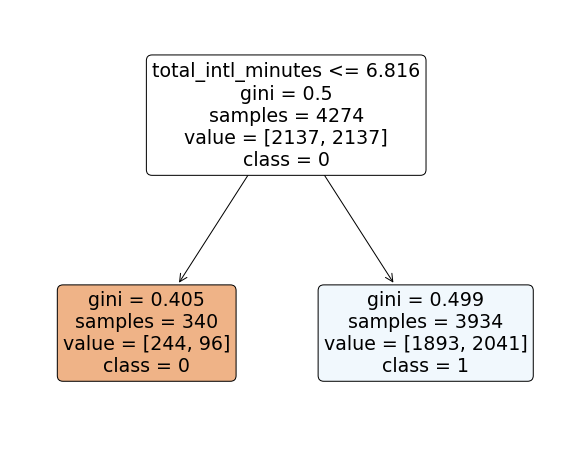

In [69]:
# Plot the decision tree of the best model
best_model = clf.best_estimator_
plt.figure(figsize=(10, 8))
plot_tree(best_model, filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns)
plt.show()

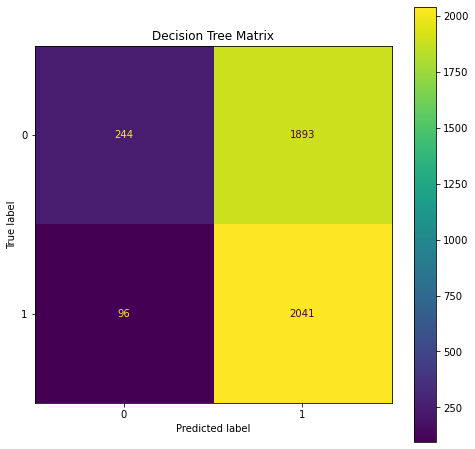

In [70]:
# Plot confusion matrix of the best model

# this matrix looks a bit awkward, do we need it?

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Decision Tree Matrix')

ConfusionMatrixDisplay.from_estimator(best_model, X_train_resampled, y_train_resampled, 
                                      display_labels=['0', '1'], ax=ax)

plt.show()

In [71]:
# Print classification report
y_pred_test = best_model.predict(X_test)

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.12      0.21       713
           1       0.15      0.92      0.26       121

    accuracy                           0.23       834
   macro avg       0.52      0.52      0.23       834
weighted avg       0.78      0.23      0.21       834



## 9. Final Evaluation & Conclusion

After becoming aware of the underfitting issues with our `LogisticRegression` and running a `DecisionTreeClassifier` it is clear that the latter is the clear choice for this <ins>_Phase 1_</ins> of the business initiative. This model provides the highest Recall or True Postive Rate and most closely satisfies the goals. Below we go into detail regarding this decision including additional recommendation on intervention approach.

**Recommendations:**

As this is <ins>_Phase 1_</ins> of the project, we are hyper focused on identifying True Positive cases while reducing False Negative instances. Therefore, we are primarily focused on recall or true positive rate.

To account for our recall-focused path, a variety of low touch to high touch engagement models is recommended to account for the high number of False Positives within these models. An automated low touch model to start and gather data on customer satisfaction of those predicted to churn will yeild best results. Acting accordingly with a scaled  approach given the feedback collected will be crutial and create a positive customer experience for all.

**Positive Implications:**

<ins>_Customer Retention:_</ins> High recall means that your model is effective at identifying customers who are likely to churn. This allows the business to proactively intervene and take steps to retain these customers, such as offering incentives, personalized promotions, or improved customer service.

<ins>_Reduced Churn:_</ins> By effectively targeting at-risk customers, you may be able to reduce the overall churn rate, leading to increased customer retention and long-term profitability.

**Negative Implications:**

<ins>_Costs:_</ins> A low precision score means that there may be a significant number of false positives, leading to unnecessary costs associated with retaining customers who were not actually at risk of churning. These costs may include incentives or discounts offered to retain customers. 

<ins>_Customer Experience:_</ins> Misclassifying customers who were not actually at risk of churning as "churners" may lead to unnecessary interventions or communications, potentially impacting the customer experience negatively.

**Data Limitation and Future Considerations:**

In <ins>_Phase 2_</ins> of the business initiative, when looking to optimize our results and produce the most accurate prediction of customers who are likely to churn, we find that it may be best to use a combination of classifier models to balance precision and recall. However, given the need to edit the training data, this posed an issue.

We would also recommend gathering additional data to account for class imbalance and revising which feature hold importance in relation to churn. Obtaining a larger dataset will also help resolve the underfitting issues we saw in our `LogisticRegression` models.

By simplifying the data before modeling, we are more likely to yield positive results and open up options to combine models using the same training data for a more balanced learning mechanism.